##Rasheed Hameed
# Kaggle User Name: RasheedHameed
# CSC 578 Nerual Networks and Deep Learning Spring 2020 - Section 910
## HW\#6 - Image Classification using CNN


This code is slightly modified from the TensorFlow tutorial  ["Convolutional Neural Network (CNN)"](https://www.tensorflow.org/tutorials/images/cnn) for the purpose of our homework. The code first downloads the data, the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and partitions the training set into training and validation sets.  Then the code builds a CNN network and trains the network with the training set. Finally the code evaluates the network performance using the validation set.
<p>
Note that there are <b>three places</b> in the code, indicated with <b>**IMPORTANT**</b>, where you choose the syntax that works for the version of TensorFlow (1 or 2) installed on your platform.


### Import TensorFlow
**\*\*IMPORTANT (1) \*\*** Uncomment either import line(s) for the version of TensorFlow (TF1 or TF2) of your platform.

In [0]:
import matplotlib.pyplot as plt

import tensorflow as tf

## For TF version 2 (just one line)
from tensorflow.keras import datasets, layers, models

## For TF version 1 (need both lines)
#from tensorflow import keras
#from keras import datasets, layers, models

In [2]:
print(tf.__version__) # 5/2020 nt: check the TF version!

2.2.0


### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is (pre-)divided into 50,000 training images and 10,000 testing images.

In [0]:
# Download the data from the repository site.
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [0]:
# !! DO NOT REMOVE THIS LINE !!
# Delete test_labels (by making it an empty list) so that we don't accidentally
# use it in the code.
test_labels = []

# Then split the training set ('train_all') into two subsets: train and 
# validation.  After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by using stratefied sampling.  
train_images, valid_images, train_labels, valid_labels \
  = train_test_split(train_all_images, train_all_labels,
                     stratify=train_all_labels, test_size=0.2)

In [0]:
# Normalize pixel values of images to be between 0 and 1
train_images, valid_images, test_images \
  = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [6]:
train_labels

array([[8],
       [3],
       [8],
       ...,
       [5],
       [4],
       [8]], dtype=uint8)

In [7]:
valid_labels

array([[3],
       [7],
       [8],
       ...,
       [1],
       [7],
       [4]], dtype=uint8)

### Verify the data

To verify that the dataset looks correct, plot the first 10 images from the training set and display the class name below each image.


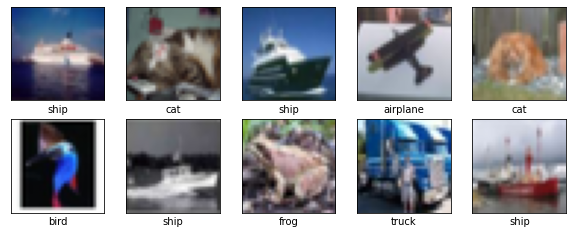

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create a convolutional Network

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, where color_channels refers to (R,G,B). The format of CIFAR images is 32 * 32 pixels, so the input shape is (32, 32, 3).
The output layer has 10 nodes, corresponding to the number of categories of the images.  
In this code, the activation function of the output layer is specified to be softmax for the purpose of aligning the two versions of TensorFlow (TF1 and TF2; in particular to make TF2  compatible with TF1's 'sparse_categorical_crossentropy' loss function).


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 5/2020 nt: as noted above

Verify the model.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### Compile the model
**\*\*IMPORTANT (2) \*\*** Uncomment either loss function for the version of TensorFlow (TF1 or TF2) of your platform.

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])

### Train the model

In [12]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5448 - accuracy: 0.4367 - val_loss: 1.2794 - val_accuracy: 0.5341
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1718 - accuracy: 0.5836 - val_loss: 1.0800 - val_accuracy: 0.6213
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0322 - accuracy: 0.6355 - val_loss: 1.0391 - val_accuracy: 0.6377
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9372 - accuracy: 0.6699 - val_loss: 0.9474 - val_accuracy: 0.6678
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8610 - accuracy: 0.6975 - val_loss: 0.9458 - val_accuracy: 0.6712
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7965 - accuracy: 0.7206 - val_loss: 0.8940 - val_accuracy: 0.6881
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7408 - accuracy: 0.7405 - val_loss: 0.9491 - val_accuracy:

### Evaluate the model
**\*\*IMPORTANT (3) \*\*** Uncomment either syntax for the version of TensorFlow (TF1 or TF2) of your platform.

313/313 - 1s - loss: 0.9705 - accuracy: 0.6860
valid_accuracy=0.6859999895095825, valid_loss=0.9705498814582825


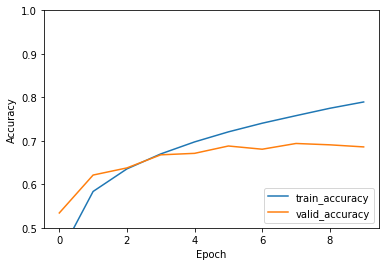

In [13]:
plt.plot(history.history['accuracy'], label='train_accuracy') # For TF2
#plt.plot(history.history['acc'], label='train_accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid_accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid_accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### **TO DO** -- Make Predictions
Apply the learned network to **'test_images'** and generate predictions.

Look at the code from HW#4 or other tutorial code for the syntax.  You generate predictions and create/write a KAGGLE submission file.

**Experimenting on Changing the Number of filters**

In [0]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(10, activation='softmax')) 

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       73984     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 256)         590080    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [0]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              metrics=['accuracy'])

In [17]:
history2 = model2.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5003 - accuracy: 0.4496 - val_loss: 1.2451 - val_accuracy: 0.5569
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1042 - accuracy: 0.6048 - val_loss: 1.0566 - val_accuracy: 0.6169
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9163 - accuracy: 0.6758 - val_loss: 0.8976 - val_accuracy: 0.6871
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7887 - accuracy: 0.7202 - val_loss: 0.8997 - val_accuracy: 0.6933
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6902 - accuracy: 0.7573 - val_loss: 0.8530 - val_accuracy: 0.7123
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5895 - accuracy: 0.7910 - val_loss: 0.8302 - val_accuracy: 0.7201
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5035 - accuracy: 0.8207 - val_loss: 0.8542 - val_accuracy:

313/313 - 1s - loss: 1.0136 - accuracy: 0.7288
valid_accuracy=0.7287999987602234, valid_loss=1.0136197805404663


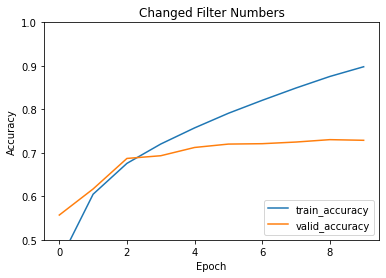

In [18]:
plt.plot(history2.history['accuracy'], label='train_accuracy') # For TF2
plt.plot(history2.history['val_accuracy'], label = 'valid_accuracy') # For TF2
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Changed Filter Numbers')
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model2.evaluate(valid_images, valid_labels, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

**Experimenting on Changing the size of filters**

In [19]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (5, 5), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(10, activation='softmax')) 

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 256)       205056    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1638656   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              metrics=['accuracy'])

In [21]:
history3 = model3.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5091 - accuracy: 0.4564 - val_loss: 1.2919 - val_accuracy: 0.5437
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1536 - accuracy: 0.5912 - val_loss: 1.0694 - val_accuracy: 0.6253
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9926 - accuracy: 0.6515 - val_loss: 1.0000 - val_accuracy: 0.6503
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8666 - accuracy: 0.6934 - val_loss: 0.9455 - val_accuracy: 0.6748
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7641 - accuracy: 0.7297 - val_loss: 0.9151 - val_accuracy: 0.6859
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6644 - accuracy: 0.7670 - val_loss: 0.9476 - val_accuracy: 0.6791
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5739 - accuracy: 0.7994 - val_loss: 0.9540 - val_accuracy:

313/313 - 1s - loss: 1.1169 - accuracy: 0.6952
valid_accuracy=0.6952000260353088, valid_loss=1.116929531097412


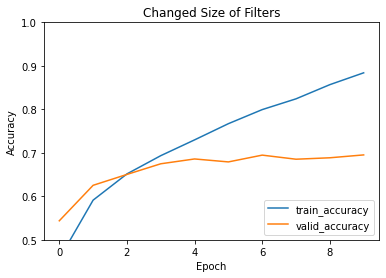

In [22]:
plt.plot(history3.history['accuracy'], label='train_accuracy') # For TF2
plt.plot(history3.history['val_accuracy'], label = 'valid_accuracy') # For TF2
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Changed Size of Filters')
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model3.evaluate(valid_images, valid_labels, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

**Experimentation on Adding Strides**

In [23]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2), strides=2))
model4.add(layers.Conv2D(256, (5, 5), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2), strides =2))
model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(10, activation='softmax')) 

model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 256)       205056    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               1638656   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [24]:
history4 = model4.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4839 - accuracy: 0.4637 - val_loss: 1.2356 - val_accuracy: 0.5591
Epoch 2/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.1241 - accuracy: 0.6051 - val_loss: 1.1189 - val_accuracy: 0.6098
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9585 - accuracy: 0.6623 - val_loss: 1.0670 - val_accuracy: 0.6416
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8414 - accuracy: 0.7053 - val_loss: 0.9371 - val_accuracy: 0.6778
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7336 - accuracy: 0.7434 - val_loss: 0.9029 - val_accuracy: 0.6935
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6439 - accuracy: 0.7737 - val_loss: 0.9021 - val_accuracy: 0.6971
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5565 - accuracy: 0.8048 - val_loss: 0.9340 - val_accuracy:

313/313 - 1s - loss: 1.1797 - accuracy: 0.6940
valid_accuracy=0.6940000057220459, valid_loss=1.1796700954437256


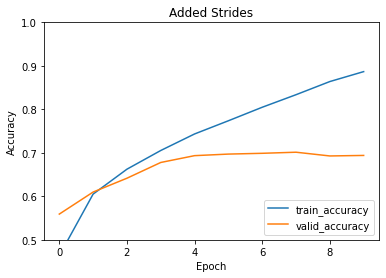

In [25]:
plt.plot(history4.history['accuracy'], label='train_accuracy') # For TF2
plt.plot(history4.history['val_accuracy'], label = 'valid_accuracy') # For TF2
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Added Strides')
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model4.evaluate(valid_images, valid_labels, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

**Experimentation on Adding Convolution layers and Fully Connected Layers**

In [26]:
model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model5.add(layers.Conv2D(32, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2), strides=2))
model5.add(layers.Conv2D(256, (5, 5), activation='relu'))
model5.add(layers.Conv2D(256, (5, 5), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2), strides =2))
model5.add(layers.Flatten())
model5.add(layers.Dense(256, activation='relu'))
model5.add(layers.Dense(10, activation='softmax')) 

model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              metrics=['accuracy'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 256)       205056    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 256)         1638656   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)             

In [27]:
history5 = model5.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5004 - accuracy: 0.4429 - val_loss: 1.1437 - val_accuracy: 0.5899
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0216 - accuracy: 0.6353 - val_loss: 0.9417 - val_accuracy: 0.6727
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8189 - accuracy: 0.7129 - val_loss: 0.7793 - val_accuracy: 0.7270
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6836 - accuracy: 0.7623 - val_loss: 0.8108 - val_accuracy: 0.7240
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.5796 - accuracy: 0.7947 - val_loss: 0.8112 - val_accuracy: 0.7308
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.4774 - accuracy: 0.8325 - val_loss: 0.7985 - val_accuracy: 0.7364
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.3822 - accuracy: 0.8644 - val_loss: 0.8396 - val_ac

313/313 - 1s - loss: 1.2056 - accuracy: 0.7270
valid_accuracy=0.7269999980926514, valid_loss=1.2055621147155762


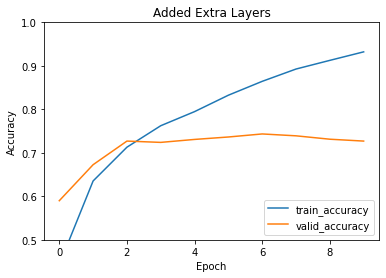

In [28]:
plt.plot(history5.history['accuracy'], label='train_accuracy') # For TF2
plt.plot(history5.history['val_accuracy'], label = 'valid_accuracy') # For TF2
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Added Extra Layers')
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model5.evaluate(valid_images, valid_labels, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

**Experimenting on adding Dropout Layers**
##Best MODEL##

In [29]:
model6 = models.Sequential()
model6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model6.add(layers.Conv2D(32, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2), strides=2))
model6.add(layers.Dropout(0.6))
model6.add(layers.Conv2D(256, (5, 5), activation='relu'))
model6.add(layers.Conv2D(256, (5, 5), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2), strides =2))
model6.add(layers.Dropout(0.25))
model6.add(layers.Flatten())
model6.add(layers.Dense(256, activation='relu'))
model6.add(layers.Dense(10, activation='softmax')) 

model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              metrics=['accuracy'])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 256)       205056    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 6, 6, 256)         1638656   
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 256)        

In [30]:
history6 = model6.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.6004 - accuracy: 0.4077 - val_loss: 1.2671 - val_accuracy: 0.5347
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2188 - accuracy: 0.5676 - val_loss: 1.0735 - val_accuracy: 0.6225
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0561 - accuracy: 0.6264 - val_loss: 0.9601 - val_accuracy: 0.6563
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9538 - accuracy: 0.6632 - val_loss: 0.8854 - val_accuracy: 0.6878
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8783 - accuracy: 0.6908 - val_loss: 0.7957 - val_accuracy: 0.7221
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8267 - accuracy: 0.7102 - val_loss: 0.8522 - val_accuracy: 0.7030
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7898 - accuracy: 0.7187 - val_loss: 0.7694 - val_ac

313/313 - 1s - loss: 0.8090 - accuracy: 0.7288
valid_accuracy=0.7287999987602234, valid_loss=0.8090083003044128


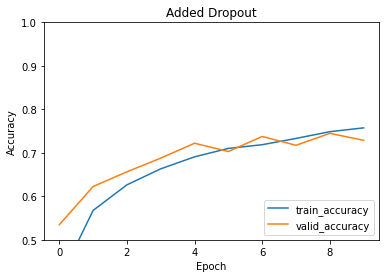

In [31]:
plt.plot(history6.history['accuracy'], label='train_accuracy') # For TF2
plt.plot(history6.history['val_accuracy'], label = 'valid_accuracy') # For TF2
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Added Dropout')
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model6.evaluate(valid_images, valid_labels, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

**Adding BatchNormalization**

In [32]:
from keras.layers import BatchNormalization
tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    renorm=False,
    renorm_clipping=None,
    renorm_momentum=0.99,
    fused=None,
    trainable=True,
    virtual_batch_size=None,
    adjustment=None,
    name=None
   
)

model7 = models.Sequential()
model7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(BatchNormalization())
model7.add(layers.Conv2D(32, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2), strides=2))
model7.add(layers.Dropout(0.6))
model7.add(layers.Conv2D(256, (5, 5), activation='relu'))
model7.add(layers.Conv2D(256, (5, 5), activation='relu'))
model7.add(layers.Dropout(0.25))
model7.add(layers.Flatten())
model7.add(layers.Dense(256, activation='relu'))

model7.add(layers.Dense(10, activation='softmax')) 

model7.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              metrics=['accuracy'])


model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 256)       205056    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 6, 6, 256)         1638656   
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 256)        

Using TensorFlow backend.


In [33]:
history7 = model7.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) 

Epoch 1/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.6112 - accuracy: 0.4011 - val_loss: 1.2708 - val_accuracy: 0.5448
Epoch 2/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.2305 - accuracy: 0.5597 - val_loss: 1.0759 - val_accuracy: 0.6149
Epoch 3/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.0644 - accuracy: 0.6202 - val_loss: 0.9613 - val_accuracy: 0.6586
Epoch 4/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.9655 - accuracy: 0.6595 - val_loss: 0.8638 - val_accuracy: 0.7015
Epoch 5/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.8998 - accuracy: 0.6852 - val_loss: 0.8511 - val_accuracy: 0.7064
Epoch 6/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.8462 - accuracy: 0.7021 - val_loss: 0.7886 - val_accuracy: 0.7248
Epoch 7/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.8091 - accuracy: 0.7146 - val_loss: 0.8085 - val_ac

313/313 - 1s - loss: 0.7800 - accuracy: 0.7282
valid_accuracy=0.7282000184059143, valid_loss=0.7800444960594177


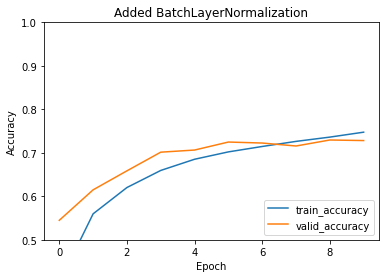

In [34]:
plt.plot(history7.history['accuracy'], label='train_accuracy') # For TF2
plt.plot(history7.history['val_accuracy'], label = 'valid_accuracy') # For TF2
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Added BatchLayerNormalization')
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model7.evaluate(valid_images, valid_labels, verbose=2) # 5/2020 nt: use validation set
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

In [0]:
import pandas as pd

x = model6.predict(valid_images)
df = pd.DataFrame(x,  columns=['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9'])
df.index.name = 'id'
df.index = df.index + 1

In [0]:
df.to_csv ('submission.csv',  header=True)

For lower value submissions this model below was choosen but the better model is model 6

In [36]:
from keras.layers import BatchNormalization
tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    renorm=False,
    renorm_clipping=None,
    renorm_momentum=0.99,
    fused=None,
    trainable=True,
    virtual_batch_size=None,
    adjustment=None,
    name=None
   
)

model8 = models.Sequential()
model8.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model8.add(layers.MaxPooling2D((2, 2), strides=5))
model8.add(layers.Dropout(.99))
model8.add(layers.Conv2D(1, (3, 3), activation='relu'))
model8.add(layers.Dropout(0.9))
model8.add(layers.Flatten())
model8.add(layers.Dense(1, activation='relu'))
model8.add(layers.Dropout(0.99))
model8.add(layers.Dense(10, activation='softmax')) 

model8.compile(optimizer='RMSProp',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              metrics=['accuracy'])


model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 1)         28        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 1)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 1)           0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 1)           10        
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 1)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [37]:
history8 = model8.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) 

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0992
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3077 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0963
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3369 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy:

In [40]:
# Evaluate the restored model
loss, acc = model.evaluate(valid_images,  valid_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))
print(model6.predict(valid_images).shape)

313/313 - 1s - loss: 0.9705 - accuracy: 0.6860
Restored model, accuracy: 68.60%
(10000, 10)
